In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Import all required libraries

In [3]:
import numpy as np
import pandas as pd

# Import re library for preprocessing using regex in  nlp
import re

import string
import nltk

#libraries for  visualization of data
import matplotlib.pyplot as depression_plot

import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots

#Vader Lexicon for labelling  
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer  #to evaluate  the polarity and compound score

# Wordclouds
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

#for stopwords removal from the data
from nltk.corpus import stopwords

import datetime
import warnings
ps = nltk.PorterStemmer()

#for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,classification_report,confusion_matrix

warnings.filterwarnings("ignore")
print("Library Setup Complete.")# To ensure all  library is imported Succesfully 

# for lemmatization to convert word to rootform
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')


Library Setup Complete.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\athul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\athul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Load the extracted twitter data

In [5]:
filtered_df = pd.read_csv('final_data.csv')


In [6]:
filtered_df

,User ID,Text,Retweets,Likes,Timestamp
0,1.340000e+18,@Mbahdeyforyou Make e no shock una when Ruger ...,0,0,2023-07-06 07:04:35+00:00
1,1.500000e+18,5. Engaging in prayer and meditation practices...,0,0,2023-07-06 07:04:33+00:00
2,1.100000e+18,@varsityshb I HAVE ANXIETY IM ALWAYS SECOND GU...,0,1,2023-07-06 07:04:17+00:00
3,7.840000e+17,"You isolated the least vulnerable, children, f...",0,0,2023-07-06 07:04:16+00:00
4,1.640000e+18,@NnekaAgu_ @GeorgeAnyiam @ThaBoyYom @Wizarab10...,0,0,2023-07-06 07:04:16+00:00
...,...,...,...,...,...
7250,1.620000e+18,NF - HAPPY https://t.co/M3lkxjv5bN via @YouTube,0,0,2023-07-08 08:25:18+00:00
7251,7.781008e+08,Congrats to George Osborne and Thea assuming t...,0,0,2023-07-08 08:25:18+00:00
7252,3.002931e+09,@sparklykitten Happy weekend! Here's Twig the ...,0,0,2023-07-08 08:25:18+00:00
7253,1.640000e+18,@EngKolleyahM Happy birthday 🎂🎉,0,0,2023-07-08 08:25:17+00:00


### Preprocessing using Neattext and RegEx libraries

In [56]:
!pip install neattext

In [57]:
# applying  neattext to text column to remove userhandles and making it a new column named cleantext
import neattext.functions as nfx

filtered_df['cleanText'] = filtered_df['Text'].apply(lambda x: nfx.remove_userhandles(x))

In [58]:
filtered_df['cleanText']

0         Make e no shock una when Ruger start to sing...
1       5. Engaging in prayer and meditation practices...
2                I HAVE ANXIETY IM ALWAYS SECOND GUESSING
3       You isolated the least vulnerable, children, f...
4               There’s only one way to see something ...
                              ...                        
7250             NF - HAPPY https://t.co/M3lkxjv5bN via  
7251    Congrats to George Osborne and Thea assuming t...
7252      Happy weekend! Here's Twig the WonderKid enj...
7253                                    Happy birthday 🎂🎉
7254                I’m happy we’re freed from haram ball
Name: cleanText, Length: 7255, dtype: object

In [59]:
#To remove multiple spaces using neattext
filtered_df['cleanText'] = filtered_df['cleanText'].apply(nfx.remove_multiple_spaces)
filtered_df['cleanText']

0        Make e no shock una when Ruger start to sing ...
1       5. Engaging in prayer and meditation practices...
2                I HAVE ANXIETY IM ALWAYS SECOND GUESSING
3       You isolated the least vulnerable, children, f...
4        There’s only one way to see something as unre...
                              ...                        
7250              NF - HAPPY https://t.co/M3lkxjv5bN via 
7251    Congrats to George Osborne and Thea assuming t...
7252     Happy weekend! Here's Twig the WonderKid enjo...
7253                                    Happy birthday 🎂🎉
7254                I’m happy we’re freed from haram ball
Name: cleanText, Length: 7255, dtype: object

In [60]:
#To remove urls from data
filtered_df['cleanText'] = filtered_df['cleanText'].apply(nfx.remove_urls)
filtered_df['cleanText']

0        Make e no shock una when Ruger start to sing ...
1       5. Engaging in prayer and meditation practices...
2                I HAVE ANXIETY IM ALWAYS SECOND GUESSING
3       You isolated the least vulnerable, children, f...
4        There’s only one way to see something as unre...
                              ...                        
7250                                     NF - HAPPY  via 
7251    Congrats to George Osborne and Thea assuming t...
7252     Happy weekend! Here's Twig the WonderKid enjo...
7253                                    Happy birthday 🎂🎉
7254                I’m happy we’re freed from haram ball
Name: cleanText, Length: 7255, dtype: object

In [61]:
#removing punctuations from the data using neattext
filtered_df['cleanText'] = filtered_df['cleanText'].apply(nfx.remove_puncts)
filtered_df['cleanText']

0        Make e no shock una when Ruger start to sing ...
1       5 Engaging in prayer and meditation practices ...
2                I HAVE ANXIETY IM ALWAYS SECOND GUESSING
3       You isolated the least vulnerable children fro...
4        There’s only one way to see something as unre...
                              ...                        
7250                                      NF  HAPPY  via 
7251    Congrats to George Osborne and Thea assuming t...
7252     Happy weekend Heres Twig the WonderKid enjoyi...
7253                                    Happy birthday 🎂🎉
7254                I’m happy we’re freed from haram ball
Name: cleanText, Length: 7255, dtype: object

In [62]:
#removing short words of length less than or equal to 1
filtered_df['cleanText'] = filtered_df['cleanText'].apply(lambda x: ' '.join(word for word in x.split() if len(word) > 1))
filtered_df['cleanText']


0       Make no shock una when Ruger start to sing Afr...
1       Engaging in prayer and meditation practices ca...
2                  HAVE ANXIETY IM ALWAYS SECOND GUESSING
3       You isolated the least vulnerable children fro...
4       There’s only one way to see something as unrea...
                              ...                        
7250                                         NF HAPPY via
7251    Congrats to George Osborne and Thea assuming t...
7252    Happy weekend Heres Twig the WonderKid enjoyin...
7253                                    Happy birthday 🎂🎉
7254                I’m happy we’re freed from haram ball
Name: cleanText, Length: 7255, dtype: object

In [63]:
# removing digits
filtered_df['cleanText'] = filtered_df['cleanText'].apply(lambda x: re.sub(r'\d+', '', x))

In [64]:
# removing stopwords like is, and,the  etc.
filtered_df['cleanText'] = filtered_df['cleanText'].apply(lambda x: nfx.remove_stopwords(x))
filtered_df['cleanText']

0               shock una Ruger start sing AfroDepression
1       Engaging prayer meditation practices provide s...
2                              ANXIETY IM SECOND GUESSING
3       isolated vulnerable children peers allowed gui...
4                       There’s way unreal depression th…
                              ...                        
7250                                             NF HAPPY
7251    Congrats George Osborne Thea assuming going ah...
7252    Happy weekend Heres Twig WonderKid enjoying mo...
7253                                    Happy birthday 🎂🎉
7254                     I’m happy we’re freed haram ball
Name: cleanText, Length: 7255, dtype: object

In [65]:
#removing unecessary symbols from the data using regEx
filtered_df['cleanText'] = filtered_df['cleanText'].apply(lambda x: re.sub(r'[%\[\]]', '', x))
filtered_df['cleanText']

0               shock una Ruger start sing AfroDepression
1       Engaging prayer meditation practices provide s...
2                              ANXIETY IM SECOND GUESSING
3       isolated vulnerable children peers allowed gui...
4                       There’s way unreal depression th…
                              ...                        
7250                                             NF HAPPY
7251    Congrats George Osborne Thea assuming going ah...
7252    Happy weekend Heres Twig WonderKid enjoying mo...
7253                                    Happy birthday 🎂🎉
7254                     I’m happy we’re freed haram ball
Name: cleanText, Length: 7255, dtype: object

In [66]:
#using lemmatizer to convert the words in its root form
lemmatizer = WordNetLemmatizer()
filtered_df['cleanText'] = filtered_df['cleanText'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
filtered_df['cleanText']

0               shock una Ruger start sing AfroDepression
1       Engaging prayer meditation practice provide se...
2                              ANXIETY IM SECOND GUESSING
3       isolated vulnerable child peer allowed guilted...
4                       There’s way unreal depression th…
                              ...                        
7250                                             NF HAPPY
7251    Congrats George Osborne Thea assuming going ah...
7252    Happy weekend Heres Twig WonderKid enjoying mo...
7253                                    Happy birthday 🎂🎉
7254                     I’m happy we’re freed haram ball
Name: cleanText, Length: 7255, dtype: object

In [67]:
# Function to remove non-English characters; regex is used to work on symbols
def remove_non_english(text):
    clean_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return clean_text

# Apply it to the 'cleanText' column in datasets
filtered_df['cleanText'] = filtered_df['cleanText'].apply(remove_non_english)

In [68]:
filtered_df['cleanText']

0               shock una Ruger start sing AfroDepression
1       Engaging prayer meditation practice provide se...
2                              ANXIETY IM SECOND GUESSING
3       isolated vulnerable child peer allowed guilted...
4                         Theres way unreal depression th
                              ...                        
7250                                             NF HAPPY
7251    Congrats George Osborne Thea assuming going ah...
7252    Happy weekend Heres Twig WonderKid enjoying mo...
7253                                      Happy birthday 
7254                       Im happy were freed haram ball
Name: cleanText, Length: 7255, dtype: object

In [69]:
#Convert Cleantext column to lower case
filtered_df['cleanText'] = filtered_df['cleanText'].str.lower()

### Labelling the data

Firstly we create a  dictionary of some words related to depression like kill, insomnia , abandon etc and create a function label_tweets  which firstly converts tweets to lower case and then giving condition ; if the words are present in tweets, based on polarity score, label it as depressed otherwise label it as non-depressed

In [70]:
depression_words = ["anxious","depression","distress","anxiety","fat", "bad", "weak", "problem", "tired", "illusion", "restless", "bored",
                    "crap", "sad", "escape", "useless", "meaningless", "crying", "reject",
                    "suffer", "sleepless", "never", "bored", "afraid", "unhappy", "ugly", "upset",
                    "awful", "torture", "unsuccessful", "helpless", "suffer", "fail", "sorrow",
                    "nobody", "blame", "damaged", "shatter", "pathetic", "insomnia", "kill",
                    "panic", "lonely", "hate", "depressed", "frustrated", "loser", "suicidal",
                    "hurt", "pain", "disappoint", "broke", "abandon", "worthless", "regret",
                    "dissatisfied", "lost", "empty", "destroyed", "ruin", "die", "sick"]

In [71]:

sia = SentimentIntensityAnalyzer()

# define a function for labelling based on depression keywords 
def label_tweets(tweet):
    tweet = tweet.lower()
    for word in depression_words:
        if word in tweet:
            sentiment_scores = sia.polarity_scores(tweet)  #polarity score based on SentimentIntensityAnalyzer in VADER
            compound_score = sentiment_scores['compound']
            if compound_score >= 0.5:
                return 'non-depressed'
            else:
                return 'depressed'
    
    return 'non-depressed'    # Tweets without depression keywords are assumed non-depressed

In [72]:
#creating a new column for label named Sentiment_label and applying the labelling function to it
filtered_df['sentiment_label'] = filtered_df['cleanText'].apply(label_tweets)


### Final labelled dataset

In [73]:
filtered_df[['sentiment_label','cleanText']]

,sentiment_label,cleanText
0,depressed,shock una ruger start sing afrodepression
1,non-depressed,engaging prayer meditation practice provide se...
2,depressed,anxiety im second guessing
3,non-depressed,isolated vulnerable child peer allowed guilted...
4,depressed,theres way unreal depression th
...,...,...
7250,non-depressed,nf happy
7251,non-depressed,congrats george osborne thea assuming going ah...
7252,non-depressed,happy weekend heres twig wonderkid enjoying mo...
7253,non-depressed,happy birthday


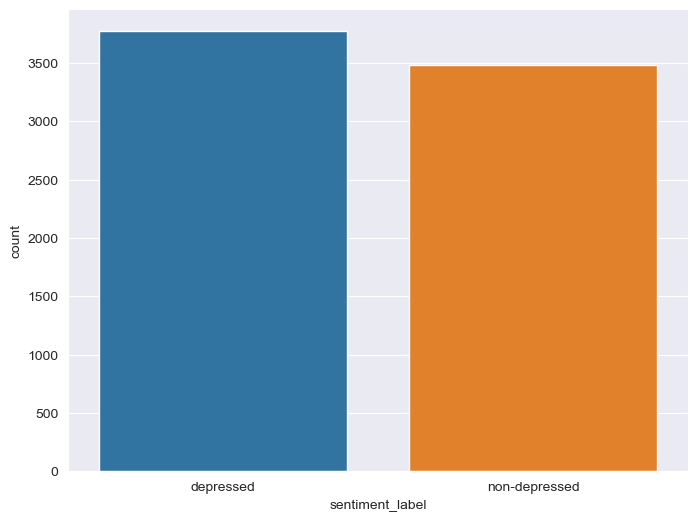

In [74]:
# Creating  countplot of labels belonging to 2 classes
# Reset index
filtered_df.reset_index(drop=True, inplace=True)
depression_plot.figure(figsize=(8, 6))


sns.countplot(data=filtered_df, x='sentiment_label');



In [75]:
# filtered_df.to_csv("labelled_data.csv")

### WordCloud for depressed and non-depressed classes

In [76]:
# Create wordcloud for depressed and non-depressed classes
from wordcloud import WordCloud

depressed_text = filtered_df[filtered_df['sentiment_label'] == 'depressed']['cleanText']
non_depressed_text = filtered_df[filtered_df['sentiment_label'] == 'non-depressed']['cleanText']

In [77]:
# Generate word clouds 
depressed_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(depressed_text))

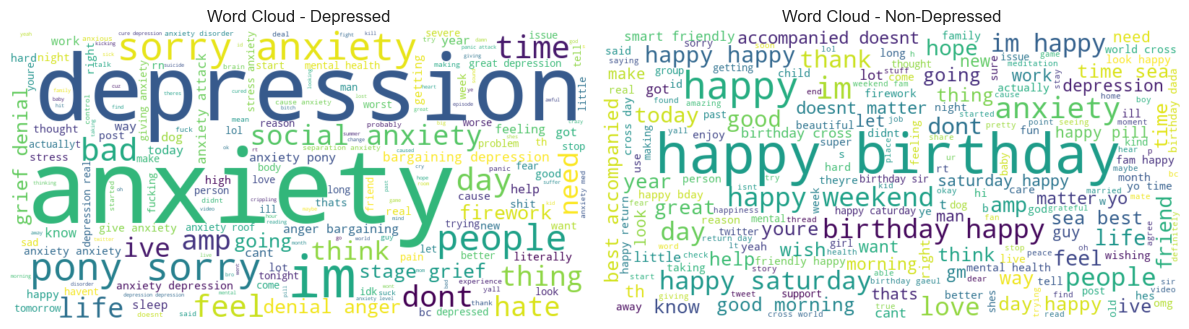

In [78]:
non_depressed_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_depressed_text))

# Plot the word clouds
depression_plot.figure(figsize=(12, 6))
depression_plot.subplot(1, 2, 1)
depression_plot.imshow(depressed_wordcloud, interpolation='bilinear')
depression_plot.title('Word Cloud - Depressed')
depression_plot.axis('off')

depression_plot.subplot(1, 2, 2)
depression_plot.imshow(non_depressed_wordcloud, interpolation='bilinear')
depression_plot.title('Word Cloud - Non-Depressed')
depression_plot.axis('off')

depression_plot.tight_layout()
depression_plot.show()


### Label Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
#To encode the label using labelEncoder
filtered_df['sentiment_label'] = lbl.fit_transform(filtered_df['sentiment_label'])

### split to X(Feature) and Y (target)

In [80]:
X = filtered_df['cleanText']

Y = filtered_df['sentiment_label']


In [81]:
Y.value_counts()

0    3770
1    3485
Name: sentiment_label, dtype: int64

### Split to train and test

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#splitting x and y variables in test and train data


In [83]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5804,) (1451,) (5804,) (1451,)


A dictionary named glove_embeddings is created which loads pre-trained GloVe word embeddings from a text file. The file's lines each correspond to a word and the associated embedding vector.

### Glove Embedding

In [84]:
glove_embeddings = {}
with open('glove.6B.100d.txt',encoding="utf8") as f: #glove.6B.100d.txt downloaded from https://nlp.stanford.edu/projects/glove/
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = coefs

A function Generate_glove_embeddings is defiend that accepts a phrase as input and outputs the average GloVe word embeddings for each word in the text.

To store each unique word embedding, an empty list named embeddings.  It pulls the appropriate embedding vector from the glove_embeddings dictionary for each word.

If a word has an embedding vector, it is added  to the embeddings list. If  there are any embeddings in the list after processing each word, it calculates the mean of all embeddings along axis 0, which is the sentence's average embedding vector. and creates a zero-filled array of size 100 as a default representation if there are no embeddings.s

In [85]:
def generate_glove_embeddings(sentence):
    embeddings = []
    for word in sentence.split():
        embedding = glove_embeddings.get(word)
        if embedding is not None:
            embeddings.append(embedding)
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)


#### Array of Glove embedding for train and test data based on above function

In [86]:
x_train_glove = np.array([generate_glove_embeddings(sentence) for sentence in x_train])
x_test_glove = np.array([generate_glove_embeddings(sentence) for sentence in x_test])


In [87]:
x_train_glove = np.expand_dims(x_train_glove, axis=2)
x_test_glove = np.expand_dims(x_test_glove, axis=2)


## Model Building : 
### Import necessary deep learning libraries

In [88]:
import os
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout,GlobalMaxPooling1D,Concatenate
import tensorflow as tf


### Tokenization of text input  and pad sequence to pad the data sequence to fixed length

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

from keras.preprocessing.text import Tokenizer

#Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

#assigning embedding dimension to all column and word index to each row of embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))#
for word, index in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word) #check if embedding vector for a word presernt in fetched gloveembeddings
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector #if found, it is allocated to particular row in embedding matrix

max_length = 100
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_length, padding='post')
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_length, padding='post')

# Splitting  the data into final train and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_pad, y_train, test_size=0.2, random_state=42)

#Baseline Dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(x_train_final, y_train_final)

# Prediction
dummy_predictions = dummy_classifier.predict(x_val)

# Accuracy of Dummy classifier 
accuracy = accuracy_score(y_val, dummy_predictions)
print("Baseline Dummy Classifier Accuracy:", accuracy)

Baseline Dummy Classifier Accuracy: 0.5107665805340224


### CNN-LSTM Model Building

In [90]:
# Defining Glorot Uniform initializer to set the seed value
from tensorflow.keras.initializers import GlorotUniform
initializer = GlorotUniform(seed=42)  

# Build the models
# CNN model
input_cnn = Input(shape=(max_length,))
embedding_cnn = Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], trainable=False)(input_cnn)
conv1d = Conv1D(512, 5, activation='relu',kernel_initializer=initializer)(embedding_cnn)   #32,64,1024

cnn_output = GlobalMaxPooling1D()(conv1d)
cnn_model = Model(inputs=input_cnn, outputs=cnn_output)

# LSTM model
input_lstm = Input(shape=(max_length,))
embedding_lstm = Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], trainable=False)(input_cnn)
lstm = LSTM(128, kernel_initializer=initializer)(embedding_lstm)    #64
lstm_model = Model(inputs=input_cnn, outputs=lstm)

#CNN-LSTM model
combined_input = Concatenate()([cnn_model.output, lstm_model.output])
ensemble_output = Dense(1, activation='sigmoid',kernel_initializer=initializer)(combined_input)
ensemble_model = Model(inputs=cnn_model.input, outputs=ensemble_output)


In [129]:
ensemble_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 100, 100)             872500    ['input_11[0][0]']            
                                                                                                  
 conv1d_5 (Conv1D)           (None, 96, 512)              256512    ['embedding_10[0][0]']        
                                                                                                  
 embedding_11 (Embedding)    (None, 100, 100)             872500    ['input_11[0][0]']            
                                                                                           

#### Tuning/Optimization  of CNN-LSTM using Adam optimizer in Keras

In [91]:
from keras.optimizers import Nadam, Adam
learning_rate = 0.15   #0.05,0.2,0.3,0.2,0.1,0.01,0.15 ,CALLBACK,90-96,89-96,90-95
opt = Adam(learning_rate=learning_rate)
ensemble_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

ensemble_model.fit(x_train_final, y_train_final, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=1,callbacks=[early_stopping]) #32,64


ensemble_scores = ensemble_model.evaluate(x_test_pad, y_test)


print("Ensemble Accuracy: %.2f%%" % (ensemble_scores[1] * 100))



Epoch 1/10
37/37 [==============================] - 9s 204ms/step - loss: 10.8932 - accuracy: 0.7521 - val_loss: 4.5271 - val_accuracy: 0.8596
Epoch 2/10
37/37 [==============================] - 8s 210ms/step - loss: 2.1776 - accuracy: 0.8813 - val_loss: 2.5090 - val_accuracy: 0.8742
Epoch 3/10
37/37 [==============================] - 8s 210ms/step - loss: 1.1087 - accuracy: 0.9076 - val_loss: 4.0446 - val_accuracy: 0.8467
Epoch 4/10
37/37 [==============================] - 8s 208ms/step - loss: 1.6104 - accuracy: 0.8923 - val_loss: 2.6316 - val_accuracy: 0.8829
Epoch 5/10
46/46 [==============================] - 1s 22ms/step - loss: 1.1474 - accuracy: 0.9125
Ensemble Accuracy: 91.25%


In [92]:
#Train accuracy of CNN-LSTM
ensemble_model.evaluate(x_train_final, y_train_final)

146/146 [==============================] - 3s 22ms/step - loss: 0.9486 - accuracy: 0.9227


[0.9485547542572021, 0.9226793050765991]

In [93]:
#Test accuracy of CNN-LSTM
ensemble_model.evaluate(x_test_pad, y_test)

46/46 [==============================] - 1s 21ms/step - loss: 1.1474 - accuracy: 0.9125


[1.147387981414795, 0.9124741554260254]

In [94]:
y_pred=ensemble_model.predict(x_test_pad)

46/46 [==============================] - 1s 21ms/step


In [95]:
y_pred

array([[5.5037632e-09],
       [1.5399259e-07],
       [9.9829006e-01],
       ...,
       [9.2543161e-01],
       [1.9533868e-01],
       [1.0000000e+00]], dtype=float32)

In [96]:

import numpy as np

# Apply threshold to convert probabilities to class labels
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

# Classification metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Test Precision:", precision_score(y_test, y_pred_labels, average='weighted'))
print("Test Recall:", recall_score(y_test, y_pred_labels, average='weighted'))
print("Test F1 Score:", f1_score(y_test, y_pred_labels, average='weighted'))


Test Accuracy: 0.912474155754652
Test Precision: 0.9127776497504277
Test Recall: 0.912474155754652
Test F1 Score: 0.9123528213274507


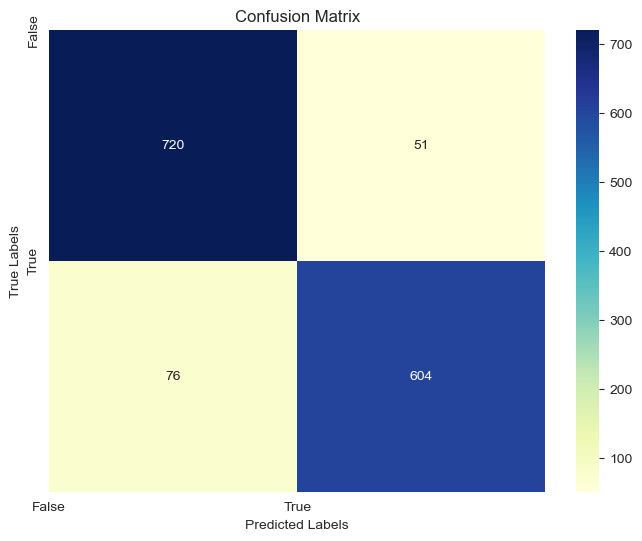

In [97]:
#confusion matrix for CNN-LSTM
cm = confusion_matrix(y_test,y_pred_labels)
import matplotlib.pyplot as depression_plot
depression_plot.figure(figsize=(8, 6))

# Creating heatmap 
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

depression_plot.xlabel("Predicted Labels")
depression_plot.ylabel("True Labels")
depression_plot.title("Confusion Matrix")
depression_plot.xticks([0, 1], ["False", "True"])
depression_plot.yticks([0, 1], ["False", "True"])

#Plot the matrix
depression_plot.show()

In [98]:
# Classification report for CNN-LSTM
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       771
           1       0.92      0.89      0.90       680

    accuracy                           0.91      1451
   macro avg       0.91      0.91      0.91      1451
weighted avg       0.91      0.91      0.91      1451



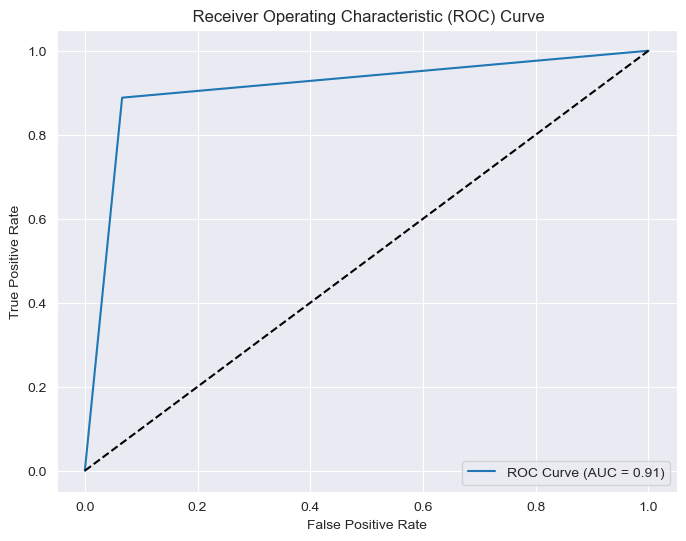

In [99]:
# Plot ROC-AUC Curve for CNN-LSTM
depression_plot.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_test,y_pred_labels)

auc = roc_auc_score(y_test,y_pred_labels)


depression_plot.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
depression_plot.plot([0, 1], [0, 1], 'k--')
depression_plot.xlabel('False Positive Rate')
depression_plot.ylabel('True Positive Rate')
depression_plot.title(' Receiver Operating Characteristic (ROC) Curve')
depression_plot.legend(loc='lower right')


depression_plot.show()


### Interpretability using LIME 

!pip install lime

In [100]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=["depressed", "non-depressed"])
import tensorflow
def my_predict_function(x):
    testing_sequences = tokenizer.texts_to_sequences(x)
    testing_padded = tensorflow.keras.preprocessing.sequence.pad_sequences(testing_sequences, maxlen=200, padding="post", truncating="post")
    pred = ensemble_model.predict(testing_padded)
    format_pred = np.concatenate([1.0-pred, pred], axis=1)
    return format_pred

# giving a tweet insatnce from dataset to predict model outcome
exp = explainer.explain_instance(filtered_df['cleanText'][1], my_predict_function, num_features=20)

# or  Giving a sample user input to predict model outcome 

# user_input = input("Enter a text for prediction: ")
# exp = explainer.explain_instance(user_input, my_predict_function, num_features=20)

print(exp.as_list())


157/157 [==============================] - 7s 41ms/step
[('thes', 0.0003911881635883189), ('peace', 0.00029106120004781003), ('provide', 0.00023216149469380438), ('connection', 0.00019652849608349263), ('god', 0.00018114069781856556), ('meditation', -0.00012663362179052382), ('prayer', -6.956227142849735e-05), ('sense', 6.516809989102943e-05), ('clarity', 5.416638523331786e-05), ('engaging', -3.6714924949169605e-05), ('practice', 1.1725191524938713e-05)]


The my_predict_function takes a list of text x as input and performs tokenization,Pads the sequences to a fixed length of 200 tokens and make predictions using an ensemble_model

In [101]:
exp.show_in_notebook(text=True)

In [102]:
X_train_features=ensemble_model.predict(x_train_final)
#predicting features of input data from a trained model
X_test_features=ensemble_model.predict(x_test_pad)
 #predicting features of test data from a trained model

46/46 [==============================] - 1s 21ms/step


### Classification using Various Classification algorithms 

 X_train_features and X_test_features from above contains the predicted features generated by CNN-LSTM model.This is now given as input to various classifiers and performance is compared as below; 

Best performing models viz, Random Forest and Adaboost are combined to form voting classifier .The voting setting is set to "soft," which implies that rather than using hard choices, voting will be based on the probabilities projected by the classifiers.


### 1. Random Forest

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
!pip install xgboost
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Defining Random forest classifier 
classifier1 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5,min_samples_split=50)

#Using GridsearchCV to find best hyper parameters
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 6, 7],
    'min_samples_split': [50, 100, 150, 200, 250]
}

#Gridsearch instance
grid_search = GridSearchCV(estimator=classifier1, param_grid=param_grid, cv=3) 

grid_search.fit(X_train_features, y_train_final)

# Best parameters
print('Best Parameters using grid search: \n', grid_search.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 150}


In [105]:
classifier1 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3,min_samples_split=150)
classifier1.fit(X_train_features, y_train_final) #fit on train data
y_pred = classifier1.predict(X_test_features) # predict on test data 

#Evaluation metrics
print("Random Forest Test Accuracy",accuracy_score(y_test,y_pred))
print("Random Forest Test Precision",precision_score(y_test,y_pred,average='weighted'))
print("Random Forest Test Recall",recall_score(y_test,y_pred,average='weighted'))
print("Random Forest Test F1 Score",f1_score(y_test,y_pred,average='weighted'))

Random Forest Test Accuracy 0.9138525155065472
Random Forest Test Precision 0.9139095848698335
Random Forest Test Recall 0.9138525155065472
Random Forest Test F1 Score 0.9138701720032342


#### 2. AdaBoost Classifier

In [106]:

ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fitting  on the training data
ada_classifier.fit(X_train_features, y_train_final)

#  prediction on the test data
y_pred = ada_classifier.predict(X_test_features)

# Evaluation metrics
print(" Adaboost  Test Accuracy",accuracy_score(y_test,y_pred))
print("Adaboost Test Precision",precision_score(y_test,y_pred,average='weighted'))
print("Adaboost Test Recall",recall_score(y_test,y_pred,average='weighted'))
print("Adaboost Test F1 Score",f1_score(y_test,y_pred,average='weighted'))

 Adaboost  Test Accuracy 0.9138525155065472
Adaboost Test Precision 0.9139095848698335
Adaboost Test Recall 0.9138525155065472
Adaboost Test F1 Score 0.9138701720032342


#### 3. XGBoost Classifier

In [108]:

import xgboost as xgb
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

xgb_classifier.fit(X_train_features, y_train_final)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_features)

# Calculate and print the evaluation metrics
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost Test Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("XGBoost Test Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("XGBoost Test F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))


XGBoost Test Accuracy: 0.9083390764989663
XGBoost Test Precision (weighted): 0.9084328193426593
XGBoost Test Recall (weighted): 0.9083390764989663
XGBoost Test F1 Score (weighted): 0.9083647618000099


#### 4. K-Nearest Neighbour(KNN) model

In [109]:
from sklearn.neighbors import KNeighborsClassifier  # normally higher values like 10/20, makes the model less sensitive to noise
neigh = KNeighborsClassifier(n_neighbors=25)
neigh.fit(X_train_features, y_train_final)
y_pred = neigh.predict(X_test_features)


#Printing  the evaluation metrics
print("Knn  Test Accuracy",accuracy_score(y_test,y_pred))
print("Knn Test Precision",precision_score(y_test,y_pred,average='weighted'))
print("Knn Test Recall",recall_score(y_test,y_pred,average='weighted'))
print("Knn Test F1 Score",f1_score(y_test,y_pred,average='weighted'))

Knn  Test Accuracy 0.9090282563749138
Knn Test Precision 0.9091036394867094
Knn Test Recall 0.9090282563749138
Knn Test F1 Score 0.9090503687188014


#### 5.Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train_features, y_train_final)

y_pred = logistic_classifier.predict(X_test_features)

# Evaluation metrics
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Test Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Logistic Regression Test Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("Logistic Regression Test F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression Test Accuracy: 0.9131633356305996
Logistic Regression Test Precision (weighted): 0.9134378341039694
Logistic Regression Test Recall (weighted): 0.9131633356305996
Logistic Regression Test F1 Score (weighted): 0.9130487806439924


#### 6.Support Vector Classifier

In [173]:
from sklearn.svm import SVC


svc_class=SVC(   C=1.0,           
    kernel='linear', # chose Linear kernel since text 
    gamma='scale',   
    coef0=0.0,
    shrinking=True,
    probability=True)
#---------------------------------------------------------------------------------------------------------------------
# # Define a grid of hyperparameters to search
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.1, 1],
#     'coef0': [0.0, 0.1, 1],
#     'shrinking': [True, False],
#     'probability': [True, False]
# }

# # Create a GridSearchCV instance
# grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=3)

# # Fit the grid search to your data
# grid_search.fit(X_train_features, y_train_final)  # Assuming X_train_features and y_train_final are defined

# # Print the best parameters and best score
# print('Best Parameters using grid search: \n', grid_search.best_params_)
# print('Best Score: ', grid_search.best_score_)
# ----------------------------------------------------------------------------------------------------------------------
svc_class.fit(X_train_features, y_train_final)
y_pred = svc_class.predict(X_test_features)

#Evaluation metrics
print("SVM  Test Accuracy",accuracy_score(y_test,y_pred))
print("SVM Test Precision",precision_score(y_test,y_pred,average='weighted'))
print("SVM Test Recall",recall_score(y_test,y_pred,average='weighted'))
print("SVM Test F1 Score",f1_score(y_test,y_pred,average='weighted'))

SVM  Test Accuracy 0.9131633356305996
SVM Test Precision 0.9134378341039694
SVM Test Recall 0.9131633356305996
SVM Test F1 Score 0.9130487806439924


#### 7. Voting Classifier
Voting classifier formed by combining the best performing models,ie, Random Forest and AdaBoost models 

In [178]:
voting_classifier = VotingClassifier(
    estimators=[ ('Adaboost', ada_classifier),('RandomForestClassifier', classifier1)],
    voting='soft'
)

voting_classifier.fit(X_train_features, y_train_final)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_split=150,
                                                     random_state=42))],
                 voting='soft')

In [179]:
y_pred = voting_classifier.predict(X_test_features)

In [180]:
print("Voting classifier Test Accuracy",accuracy_score(y_test,y_pred))
print("Voting Classifier Test Precision",precision_score(y_test,y_pred,average='weighted'))
print("Voting Classifier Test Recall",recall_score(y_test,y_pred,average='weighted'))
print("Voting Classifier Test F1 Score",f1_score(y_test,y_pred,average='weighted'))

Voting classifier Test Accuracy 0.9138525155065472
Voting Classifier Test Precision 0.9139095848698335
Voting Classifier Test Recall 0.9138525155065472
Voting Classifier Test F1 Score 0.9138701720032342


### Evaluation of model :
#### i) Cross Validation 

In [181]:
from sklearn.model_selection import cross_val_score



# cross-validation and scores for each metric
scores = cross_val_score(voting_classifier, X_test_features, y_test, cv=3, scoring="accuracy")

#Calculate mean scores for each metric
print("Voting Classifier Cross-Validation Scores:")
print("Voting Classifier Accuracy:", scores.mean())
print("****************")
print("Accuracy:", scores)


Voting Classifier Cross-Validation Scores:
Voting Classifier Accuracy: 0.9145420894432753
****************
Accuracy: [0.93595041 0.89256198 0.91511387]


Voting Classifier appears to be performing well with a decent level of accuracy, and the cross-validation results indicate that it generalizes reasonably well across different subsets of the data.

In [139]:
#Confusion matrix for voting classifier 
import matplotlib.pyplot as depression_plot
depression_plot.figure(figsize=(8, 6))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

#To  Set labels and title
depression_plot.xlabel("Predicted Labels")
depression_plot.ylabel("True Labels")

#Title
depression_plot.title("Voting Classfier Confusion Matrix")
depression_plot.xticks([0, 1], ["False", "True"])
depression_plot.yticks([0, 1], ["False", "True"])


depression_plot.show()

#### ii) Classification report

In [137]:
#Classification report for voting classifier 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       771
           1       0.91      0.91      0.91       680

    accuracy                           0.91      1451
   macro avg       0.91      0.91      0.91      1451
weighted avg       0.91      0.91      0.91      1451



#### iii) ROC-AUC curve

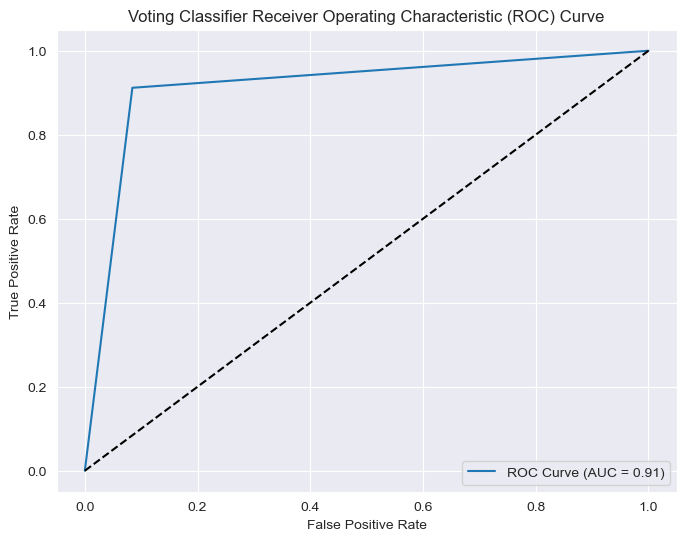

In [172]:
# ROC-AUC Curve for voting classifier
depression_plot.figure(figsize=(8, 6))

 #calcualting false positive rate:FPR ,true positive rate:TPR  and threshlod for ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

#calculatng the area under ROC curve
auc = roc_auc_score(y_test,y_pred)

#plotting ROC line plot 
depression_plot.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))

#diagonal line for reference
depression_plot.plot([0, 1], [0, 1], 'k--')


#labels and title
depression_plot.xlabel('False Positive Rate')
depression_plot.ylabel('True Positive Rate')
depression_plot.title('Voting Classifier Receiver Operating Characteristic (ROC) Curve')

depression_plot.legend(loc='lower right')


depression_plot.show()


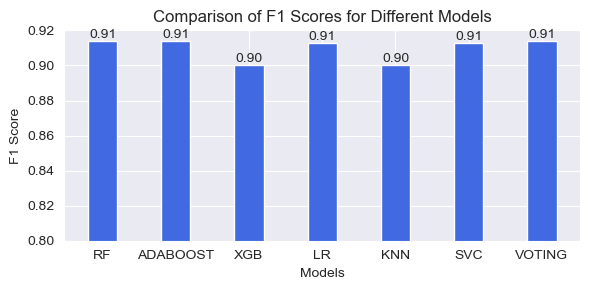

In [7]:

#printing F1 score of the model for highest accuracy achieved yet ie,91.38%

import matplotlib.pyplot as plt

# giving input : Model names and corresponding F1 scores
model_names = [ "RF", "ADABOOST", "XGB","LR","KNN","SVC","VOTING"]
f1_scores = [ 0.914, 0.914, 0.90,0.913,0.90,0.913,0.914]

# Plot bar graph
plt.figure(figsize=(6, 3))
plt.bar(model_names, f1_scores, color='royalblue',width=0.4)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0.80, 0.92)  #Y axis range
plt.xticks(rotation=0)  

# To Display F1 scores on top 
for i, score in enumerate(f1_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

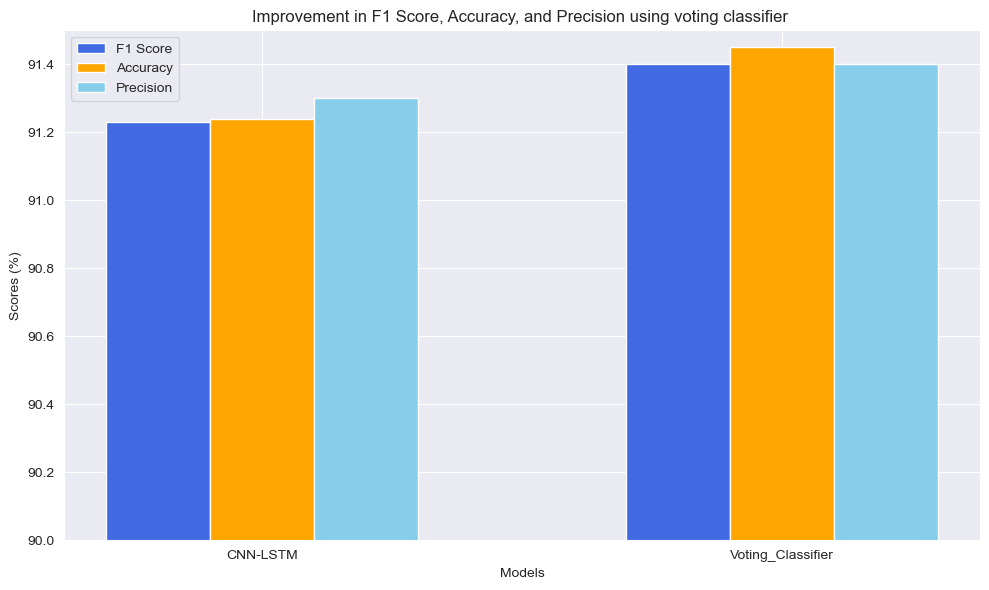

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and scores in %
model_names = ["CNN-LSTM", "Voting_Classifier"]
f1_scores = [91.23, 91.4]  
accuracy_scores = [91.24, 91.45]  
precision_scores = [91.3, 91.4]  

## To assign width and  positions for the bars
x = np.arange(len(model_names))
bar_width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

# Plot F1 score,accuracy,precision as a percentage
ax.bar(x - bar_width, f1_scores, bar_width, label='F1 Score', color='royalblue')
ax.bar(x, accuracy_scores, bar_width, label='Accuracy', color='orange')
ax.bar(x + bar_width, precision_scores, bar_width, label='Precision', color='skyblue')

# Assigning labels,title and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Improvement in F1 Score, Accuracy, and Precision using voting classifier ')
ax.legend(loc='upper left')

# Setting the y-axis range
ax.set_ylim(90, 91.5)

# Setting the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names)

# To rotate x-axis labels if required for better readability
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Combining CNN-LSTM with the best classifiers (Adaboost+Random forest as voting classifier) yields improved accuracy,F1 score, Precision and recall. Also the classification report of voting classifier affirms the same.


final CNN-LSTM = 91.25 ---> voting=rf+ada=91.38